# scikit-learn (sklearn)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [3]:
# load the built-in iris dataset and convert to a DataFrame

iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# create a tidy pandas DataFrame

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_names'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# quick EDA on iris

df_iris.info()
df_iris.describe()

print(df_iris['target_names'].value_counts())

df_iris.groupby('target_names').mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   target_names       150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB
target_names
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


C:\Users\neelp\AppData\Local\Temp\ipykernel_29768\2588348277.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_iris.groupby('target_names').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


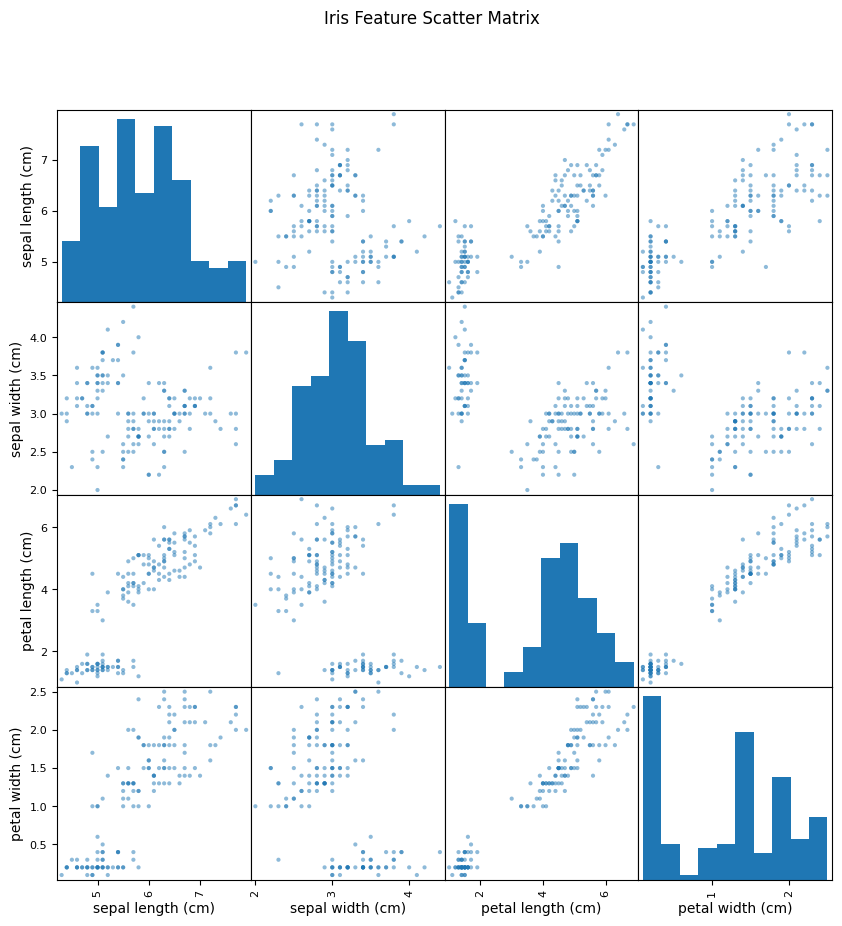

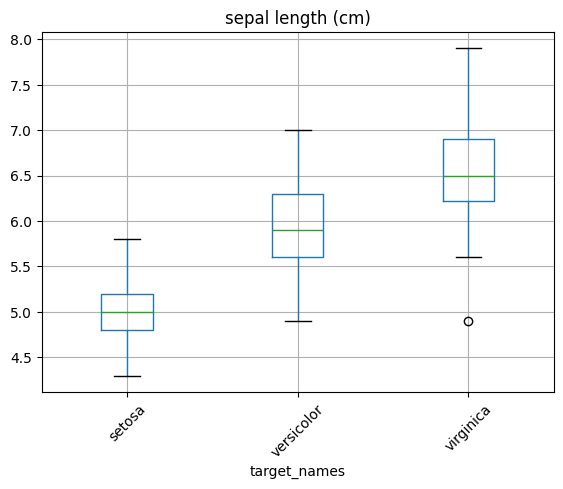

In [7]:
# visualize simple plots

from pandas.plotting import scatter_matrix

scatter_matrix(df_iris[iris.feature_names], figsize=(10, 10))
plt.suptitle('Iris Feature Scatter Matrix')
plt.show()

df_iris.boxplot(column='sepal length (cm)', by='target_names', rot=45)
plt.suptitle('')
plt.show()

Image Shape: (1797, 8, 8)


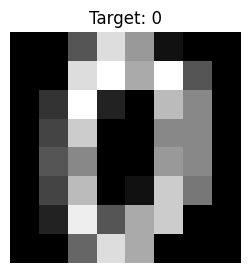

In [13]:
# load digits dataset (images) and preview

digits = datasets.load_digits()
print("Image Shape:", digits.images.shape)

df_digits = pd.DataFrame(digits.data)
df_digits['target'] = digits.target
df_digits.head()

plt.figure(figsize=(3, 3))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f'Target: {digits.target[0]}')
plt.axis('off')
plt.show()

In [14]:
# fetch a dataset from OpenML

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print("mnist Data shape:", mnist.data.shape, "mnist Target shape:", mnist.target.shape)

mnist Data shape: (70000, 784) mnist Target shape: (70000,)


In [15]:
# quick train/test split smoke test

x = df_iris[iris.feature_names].values
y = df_iris['target'].values

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42, stratify=y
)
print(x_train.shape, x_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

print("Train Accuracy:", knn.score(x_train, y_train))
print("Test Accuracy:", knn.score(x_test, y_test))

(120, 4) (30, 4)
Train Accuracy: 0.9583333333333334
Test Accuracy: 1.0


In [17]:
# save & load a trained model

joblib.dump(knn, 'knn_iris_model.joblib')

knn_loaded = joblib.load('knn_iris_model.joblib')
print("Loaded model Test Accuracy:", knn_loaded.score(x_test, y_test))


# Save dataset to csv

df_iris.to_csv('iris_dataset.csv', index=False)

Loaded model Test Accuracy: 1.0
